<a href="https://colab.research.google.com/github/GabrielaRomoM/SIGNALS-THEORY_2024-1/blob/main/ModulationClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [ ]:
#librerias
from IPython.display import clear_output
from sklearn.cluster import KMeans
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pickle
import zipfile
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar Base de datos

In [ ]:
def fileload():
  file = '/content/drive/MyDrive/basedata.zip'
  with zipfile.ZipFile(file ,'r') as zip_ref:
    zip_ref.extractall('/content/basedata')

In [ ]:
def read():
  base = '/content/basedata/RML2016.10a_dict.dat'
  try:
    with open(base, 'rb') as f:
      datos = pickle.load(f, encoding='latin1')
      print(datos.keys())
      return datos
  except Exception as e:
    print(f"Error")

# Funciones

## Modulación PSK y QAM

In [ ]:
# Función para añadir ruido a la señal
def add_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para generar diferentes modulaciones PSK y QAM
def modulate_psk(M, num_symbols):
    symbols = np.arange(M)
    angles = 2 * np.pi * symbols / M
    signal = np.exp(1j * angles)
    indices = np.random.randint(0, M, num_symbols)
    return signal[indices]

def modulate_qam(M, num_symbols):
    m = int(np.sqrt(M))
    real = np.repeat(np.arange(-m+1, m, 2), m)
    imag = np.tile(np.arange(-m+1, m, 2), m)
    signal = real + 1j * imag
    indices = np.random.randint(0, M, num_symbols)
    return signal[indices]

## QPSK

In [ ]:
def quad(label):
  # Initialize lists to store the mean radius for each SNR
  mean_radii = []
  snr_values = []

  # Percentage of points to be included in the circle
  percentile = 90
  num_symbols = 1000
  plt.figure(figsize=(16, 15))
  for i, snr in enumerate(snr_levels[:20]):
      plt.subplot(4, 5, i+1)

      # Signal
      mod_sig = modulate_psk(4, 1000)
      noisy_sig = add_noise(mod_sig, snr)

      # Reshape noisy signal to have both real and imaginary components
      noisy_sig_reshaped = np.column_stack((noisy_sig.real, noisy_sig.imag))

      # Centroids
      centroids = 4
      k_means = KMeans(n_clusters=centroids)
      k_means.fit(noisy_sig_reshaped)
      centroids = k_means.cluster_centers_
      labels = k_means.labels_

      # Store the radii for each cluster
      cluster_radii = []

      # Loop over each cluster to calculate the radius
      for cluster in range(centroids.shape[0]):
        # Get the points assigned to the current cluster
        points_in_cluster = noisy_sig_reshaped[labels == cluster]

        # Calculate the distances from the points to the centroid
        distances = np.linalg.norm(points_in_cluster - centroids[cluster], axis=1)

        # Sort distances and get the distance at the 90th percentile
        radius_90_percentile = np.percentile(distances, percentile)
        cluster_radii.append(radius_90_percentile)

      # Calculate the mean radius across all clusters for the current SNR
      mean_radius = np.mean(cluster_radii)
      mean_radii.append(mean_radius)

      # Store the SNR value
      snr_values.append(snr)

      # Plot each cluster with different colors
      plt.scatter(noisy_sig_reshaped[labels == 0, 0], noisy_sig_reshaped[labels == 0, 1], color='red')
      plt.scatter(noisy_sig_reshaped[labels == 1, 0], noisy_sig_reshaped[labels == 1, 1], color='blue')
      plt.scatter(noisy_sig_reshaped[labels == 2, 0], noisy_sig_reshaped[labels == 2, 1], color='green')
      plt.scatter(noisy_sig_reshaped[labels == 3, 0], noisy_sig_reshaped[labels == 3, 1], color='cyan')

      # Plot centroids
      plt.scatter(centroids[:, 0], centroids[:, 1], color='magenta', marker='o', s=100)

      # Graph configuration
      plt.title(f'{label} - SNR {snr} dB')
      plt.xlabel('In-phase')
      plt.ylabel('Quadrature')
      plt.grid(True)

  plt.tight_layout()
  plt.show()
  return np.array(mean_radii), np.array(snr_values)

## QAM16 y QAM64

In [ ]:
def qam16(label):
  # Initialize lists to store the mean radius for each SNR
  mean_radii = []
  snr_values = []

  # Percentage of points to be included in the circle
  percentile = 90
  num_symbols = 1000
  plt.figure(figsize=(16, 15))
  for i, snr in enumerate(snr_levels[:20]):
      plt.subplot(4, 5, i+1)

      # Signal
      mod_sig = modulate_qam(16, 1000)
      noisy_sig = add_noise(mod_sig, snr)

      # Reshape noisy signal to have both real and imaginary components
      noisy_sig_reshaped = np.column_stack((noisy_sig.real, noisy_sig.imag))

      # Centroids
      centroids = 16
      k_means = KMeans(n_clusters=centroids)
      k_means.fit(noisy_sig_reshaped)
      centroids = k_means.cluster_centers_
      labels = k_means.labels_

      # Store the radii for each cluster
      cluster_radii = []

      # Loop over each cluster to calculate the radius
      for cluster in range(centroids.shape[0]):
        # Get the points assigned to the current cluster
        points_in_cluster = noisy_sig_reshaped[labels == cluster]

        # Calculate the distances from the points to the centroid
        distances = np.linalg.norm(points_in_cluster - centroids[cluster], axis=1)

        # Sort distances and get the distance at the 90th percentile
        radius_90_percentile = np.percentile(distances, percentile)
        cluster_radii.append(radius_90_percentile)

      # Calculate the mean radius across all clusters for the current SNR
      mean_radius = np.mean(cluster_radii)
      mean_radii.append(mean_radius)

      # Store the SNR value
      snr_values.append(snr)

      for cluster in range(centroids.shape[0]):
            plt.scatter(noisy_sig_reshaped[labels == cluster, 0],
                        noisy_sig_reshaped[labels == cluster, 1], label=f'Cluster {cluster}')

      # Plot centroids
      plt.scatter(centroids[:, 0], centroids[:, 1], color='magenta', marker='o', s=100)

      # Graph configuration
      plt.title(f'{label} - SNR {snr} dB')
      plt.xlabel('In-phase')
      plt.ylabel('Quadrature')
      plt.grid(True)

  plt.tight_layout()
  plt.show()
  return np.array(mean_radii), np.array(snr_values)

def qam64(label):
  # Initialize lists to store the mean radius for each SNR
  mean_radii = []
  snr_values = []

  # Percentage of points to be included in the circle
  percentile = 90
  num_symbols = 1000
  plt.figure(figsize=(18, 18))
  for i, snr in enumerate(snr_levels[:20]):
      plt.subplot(5, 4, i+1)

      # Signal
      mod_sig = modulate_qam(64, 1000)
      noisy_sig = add_noise(mod_sig, snr)

      # Reshape noisy signal to have both real and imaginary components
      noisy_sig_reshaped = np.column_stack((noisy_sig.real, noisy_sig.imag))

      # Centroids
      centroids = 64
      k_means = KMeans(n_clusters=centroids)
      k_means.fit(noisy_sig_reshaped)
      centroids = k_means.cluster_centers_
      labels = k_means.labels_

      # Store the radii for each cluster
      cluster_radii = []

      # Loop over each cluster to calculate the radius
      for cluster in range(centroids.shape[0]):
        # Get the points assigned to the current cluster
        points_in_cluster = noisy_sig_reshaped[labels == cluster]

        # Calculate the distances from the points to the centroid
        distances = np.linalg.norm(points_in_cluster - centroids[cluster], axis=1)

        # Sort distances and get the distance at the 90th percentile
        radius_90_percentile = np.percentile(distances, percentile)
        cluster_radii.append(radius_90_percentile)

      # Calculate the mean radius across all clusters for the current SNR
      mean_radius = np.mean(cluster_radii)
      mean_radii.append(mean_radius)

      # Store the SNR value
      snr_values.append(snr)

      for cluster in range(centroids.shape[0]):
            plt.scatter(noisy_sig_reshaped[labels == cluster, 0],
                        noisy_sig_reshaped[labels == cluster, 1], label=f'Cluster {cluster}')

      # Plot centroids
      plt.scatter(centroids[:, 0], centroids[:, 1], color='magenta', marker='o', s=100)

      # Graph configuration
      plt.title(f'{label} - SNR {snr} dB')
      plt.xlabel('In-phase')
      plt.ylabel('Quadrature')
      plt.grid(True)

  plt.tight_layout()
  plt.show()
  return np.array(mean_radii), np.array(snr_values)

#Ejecución

In [ ]:
fileload()
datos = read()
# Extract modulation forms from the dictionary keys
modulation_forms = list({key[0] for key in datos.keys()})
snr_levels = sorted(list({key[1] for key in datos.keys()}))

dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('8PSK', 8), ('8PSK', 12), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('PAM4', -6), ('WBFM', -18), ('AM-DSB', 16), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('BPSK', -10), ('QPSK', 8), ('PAM4', 14), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('WBFM', -4), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('8PSK', -8), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('GFSK', 18), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), ('AM-DSB', -12), ('PAM4

## QPSK

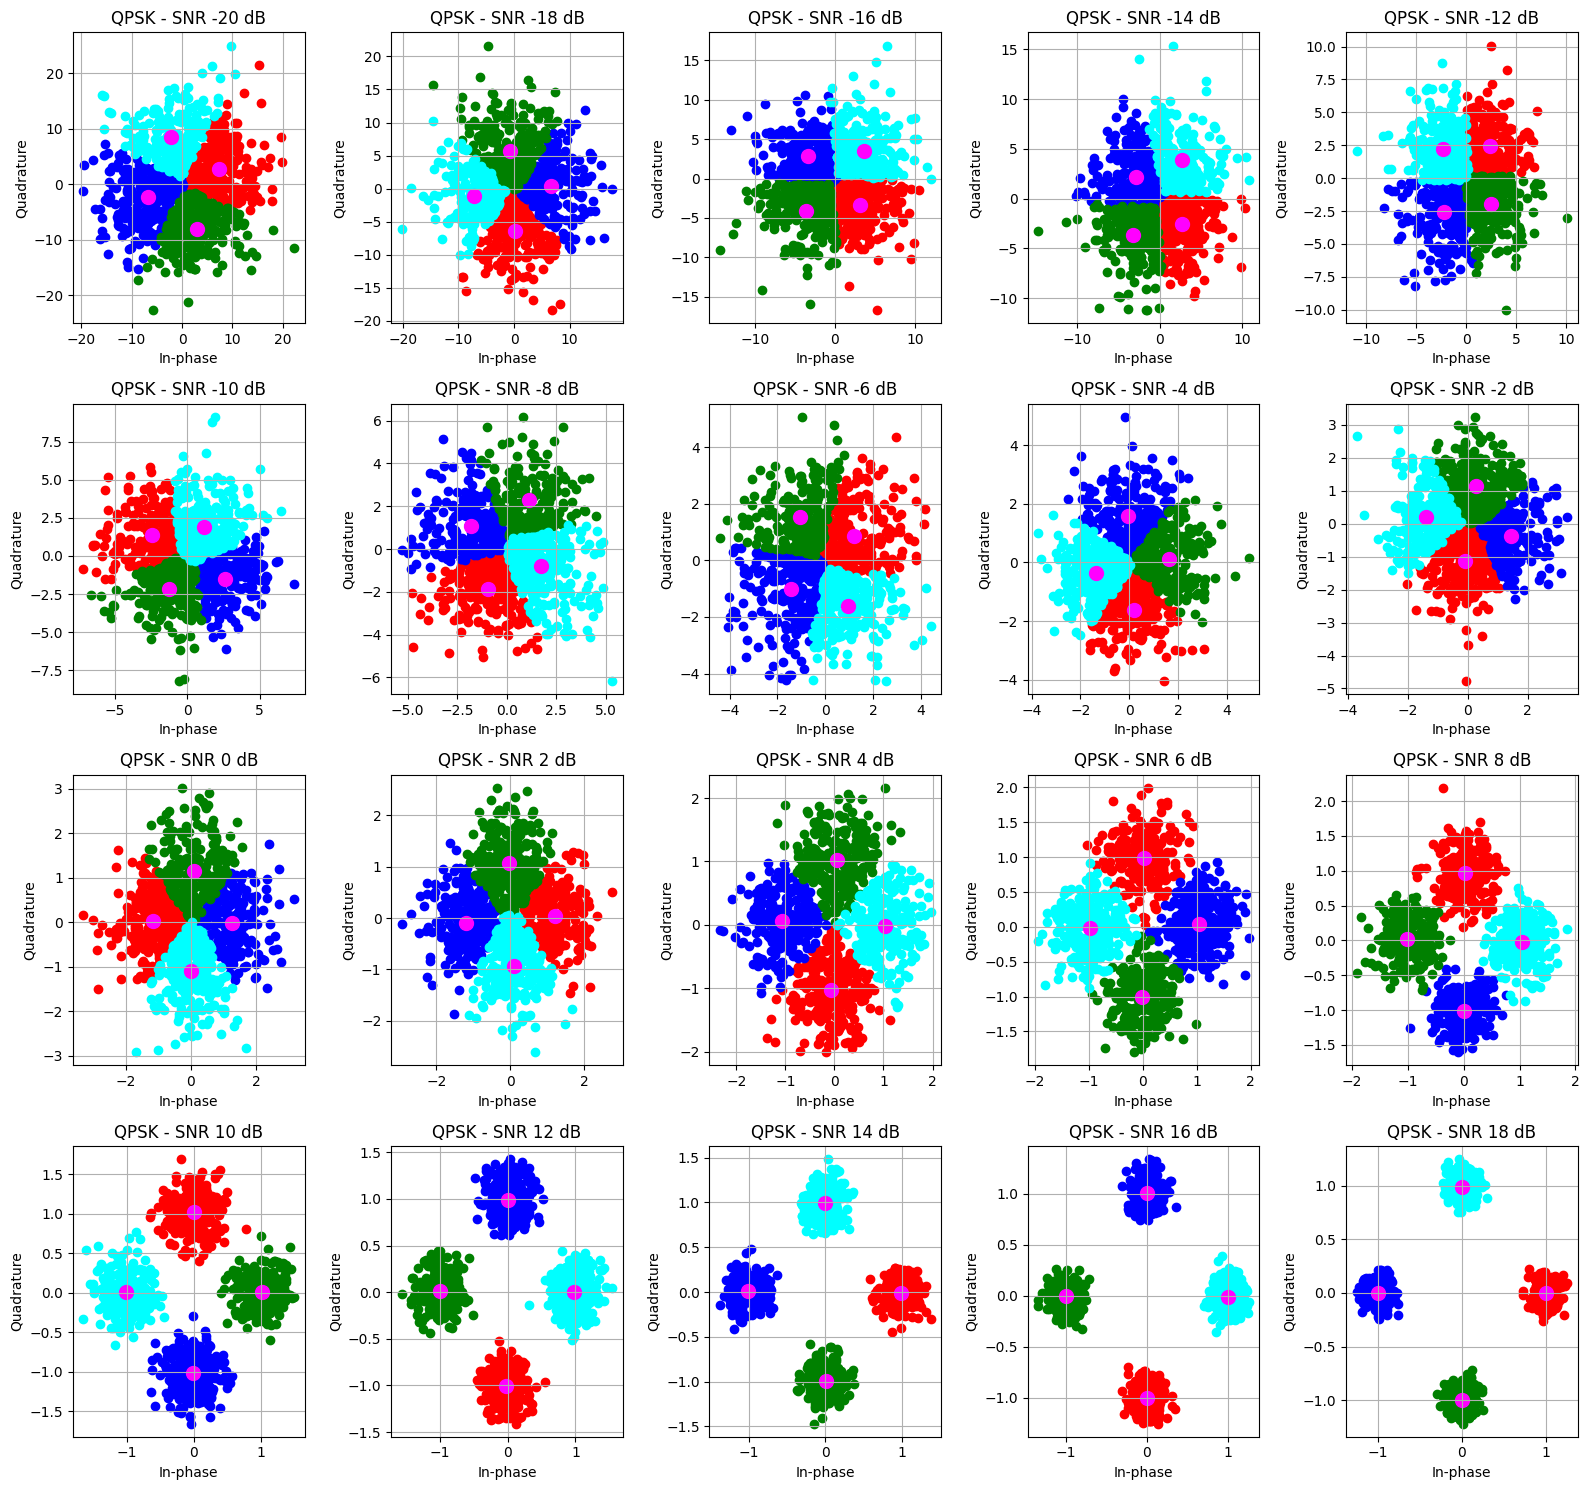

In [ ]:
mean_ratio, snr_values = quad('QPSK')

## QAM16

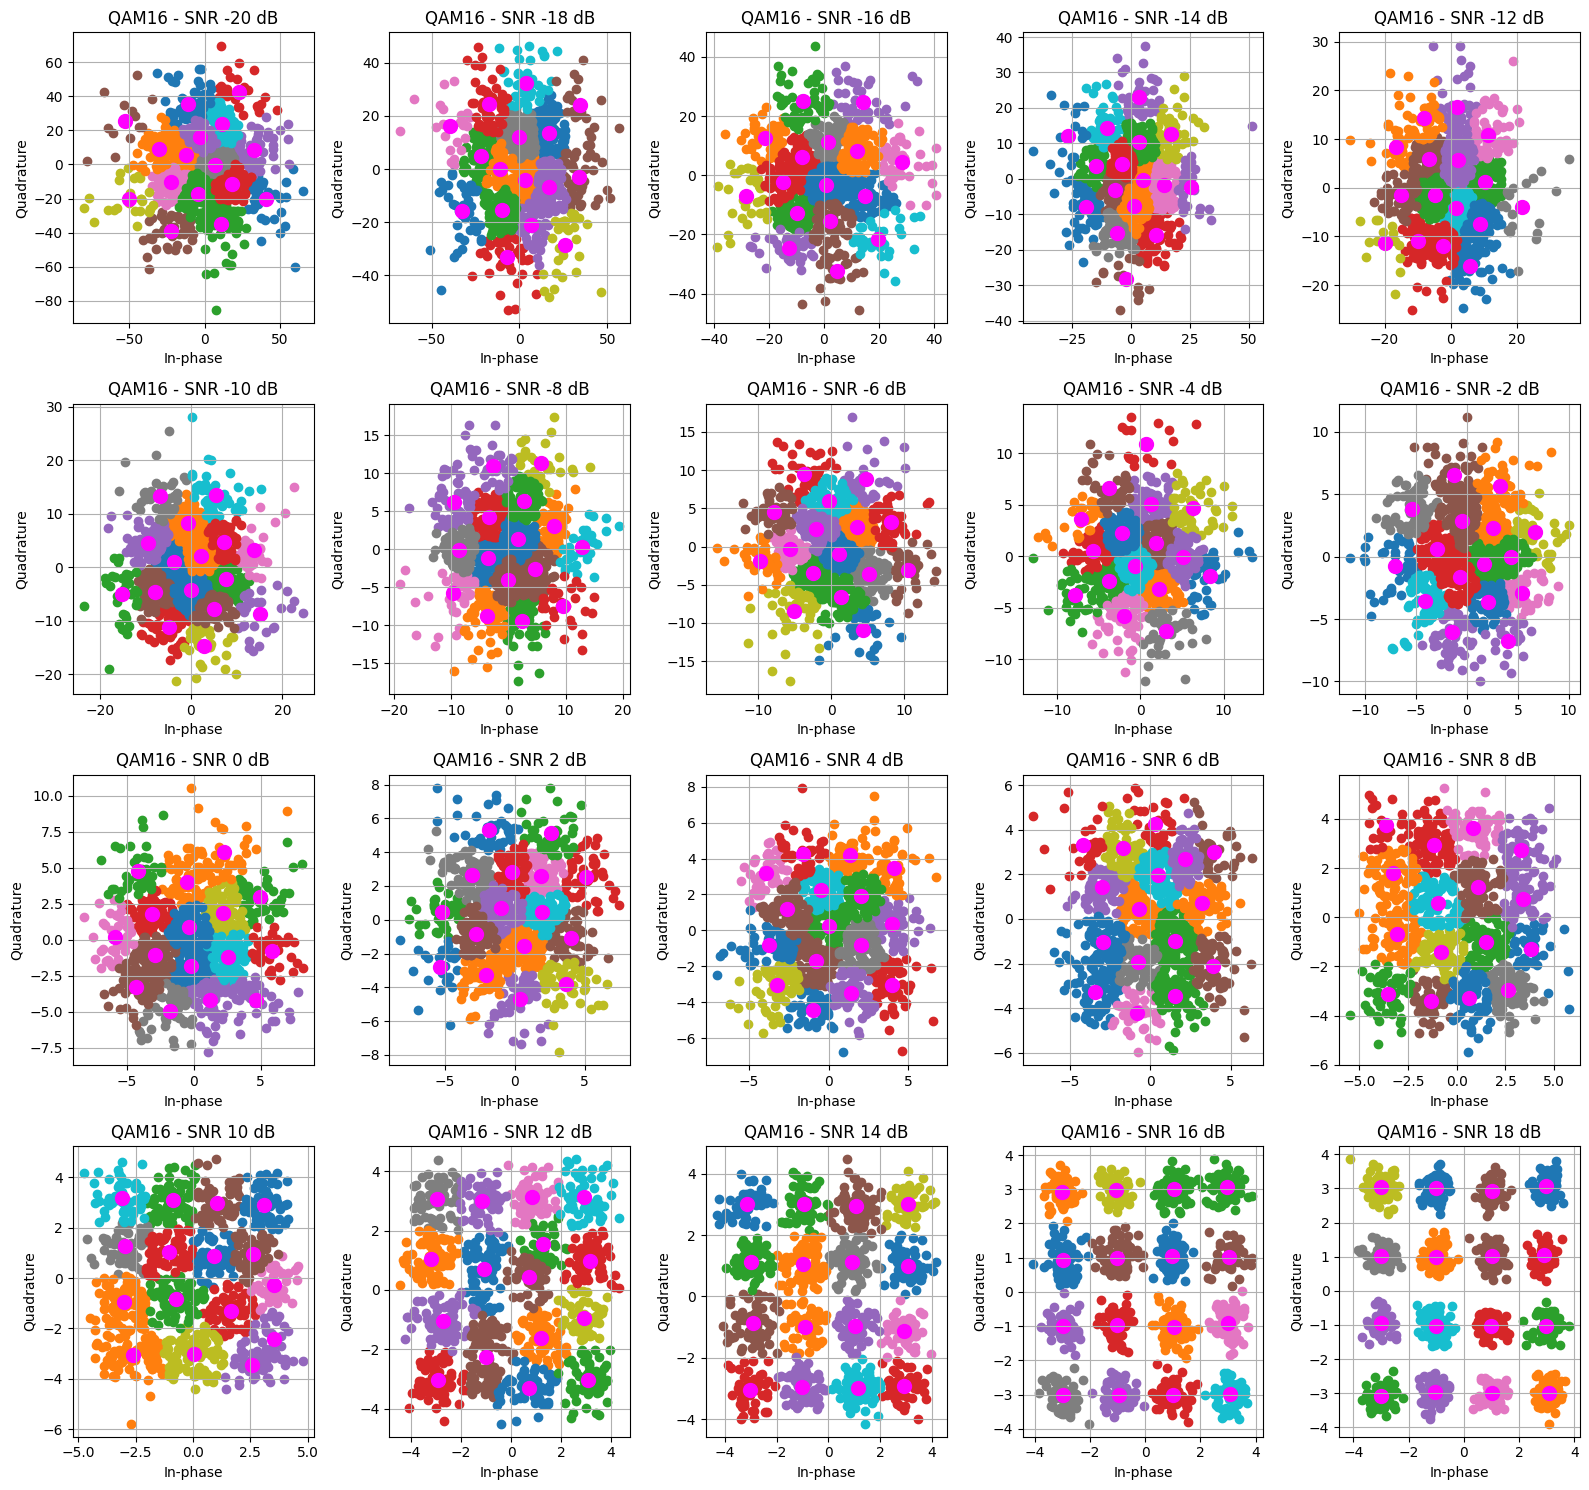

In [ ]:
mean_ratio2, snr_values2 = qam16('QAM16')

## QAM64

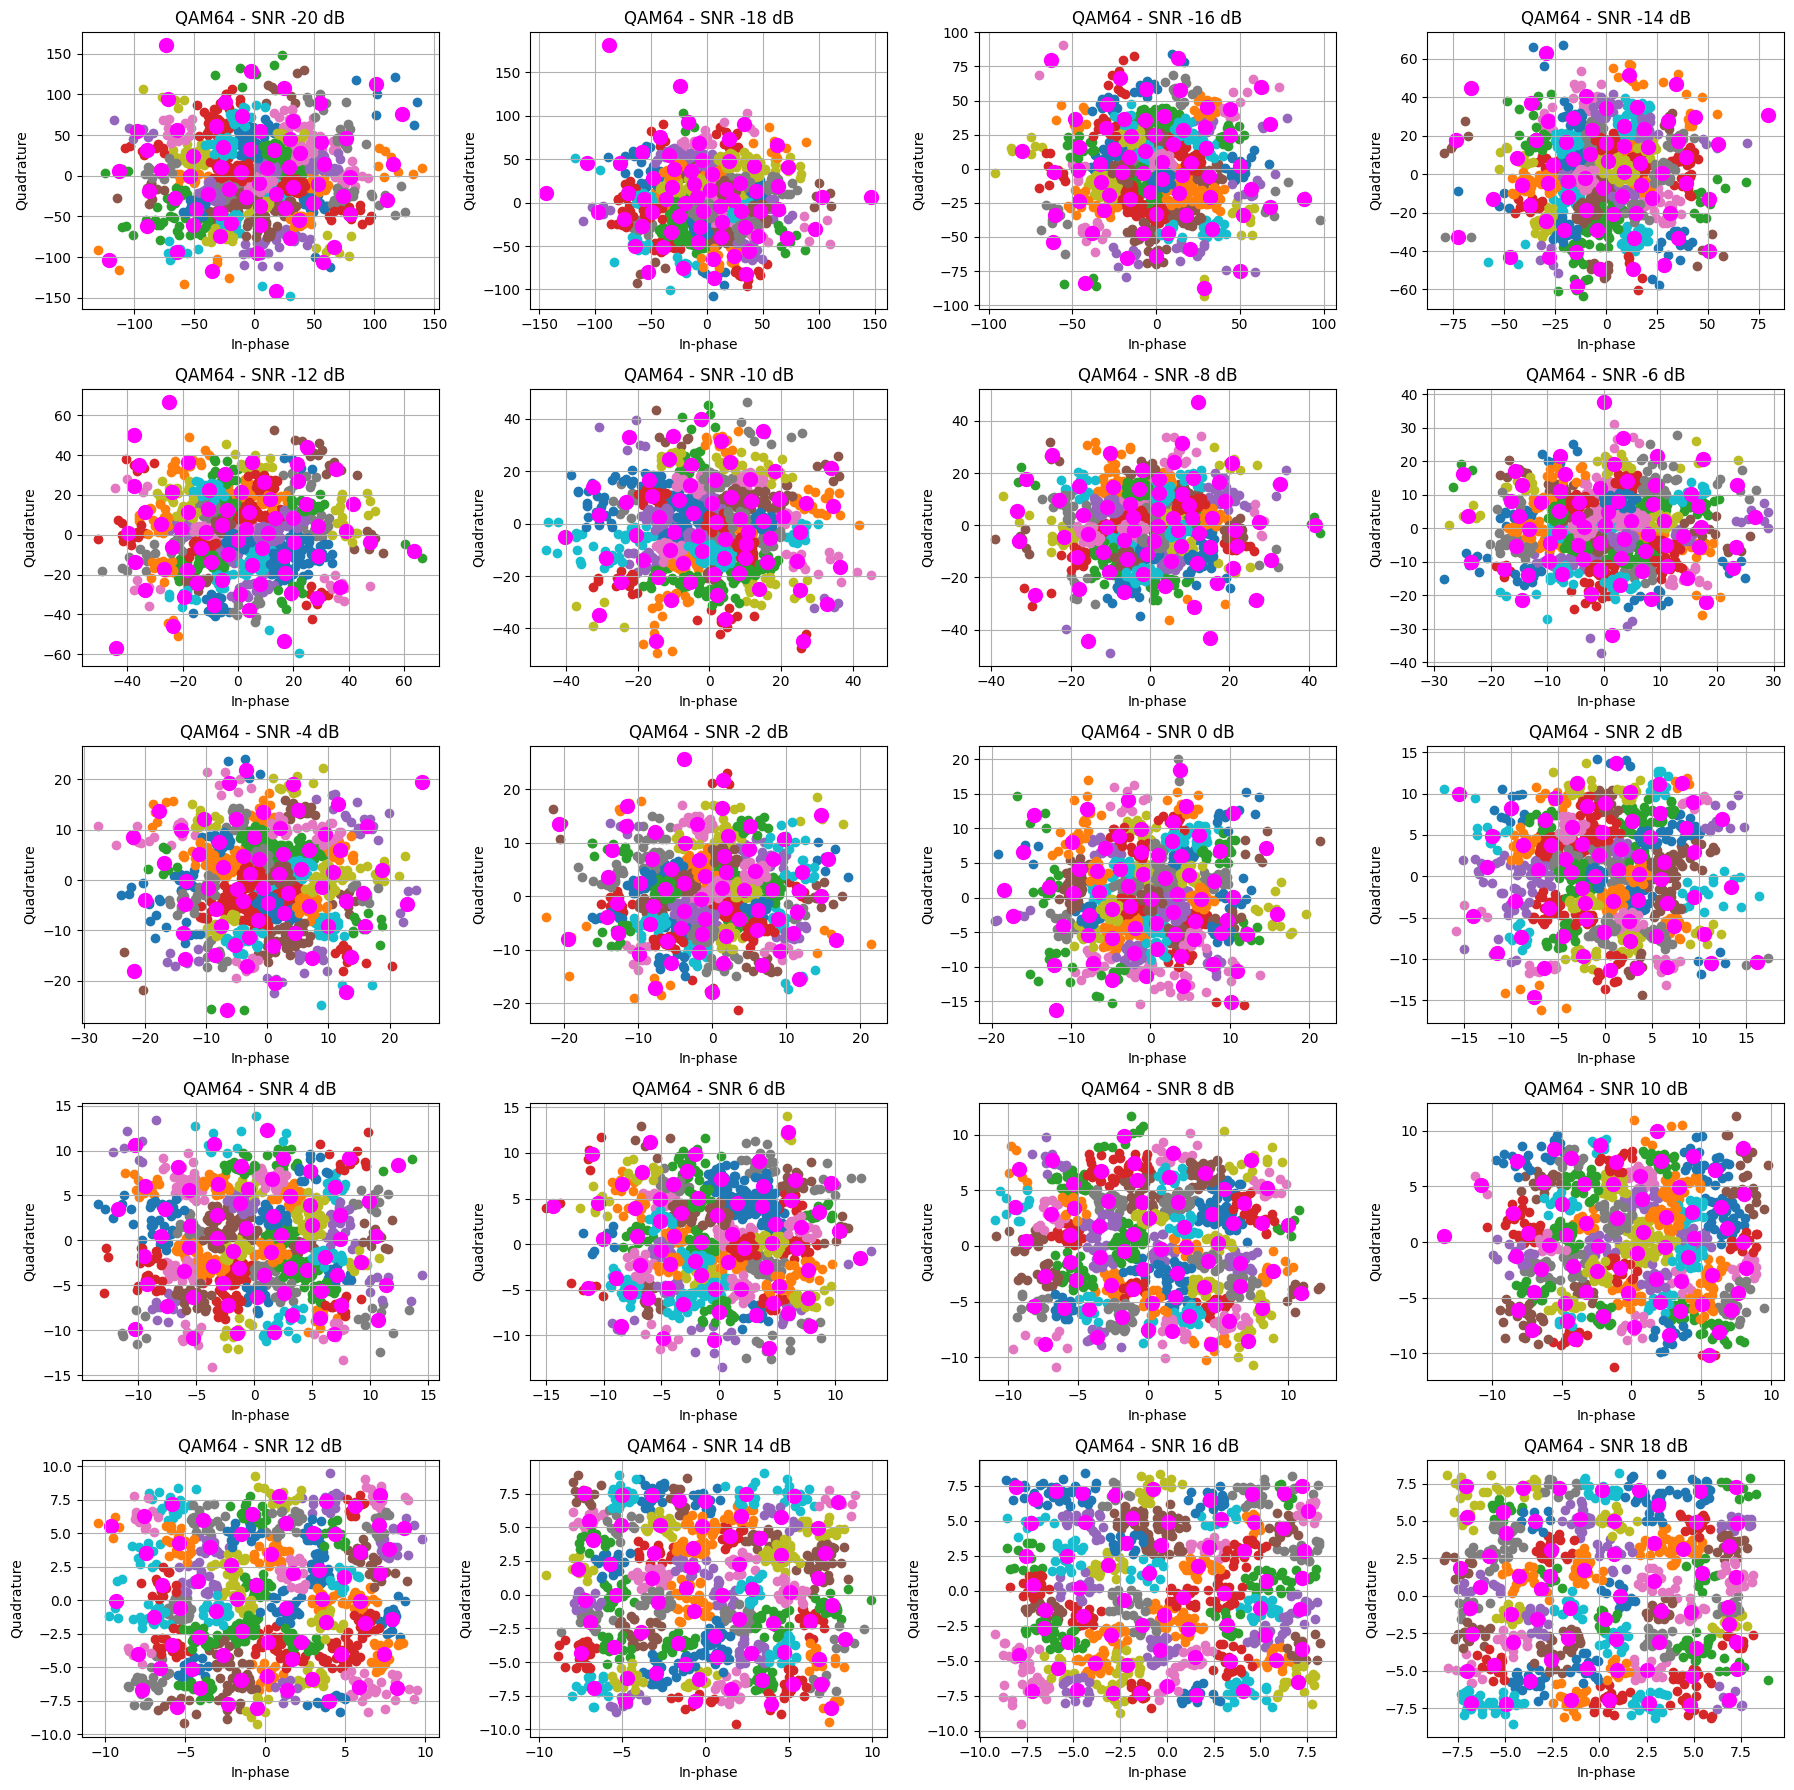

In [ ]:
mean_ratio3, snr_values3 = qam64('QAM64')

## Curvas Radio Medio vs SNR

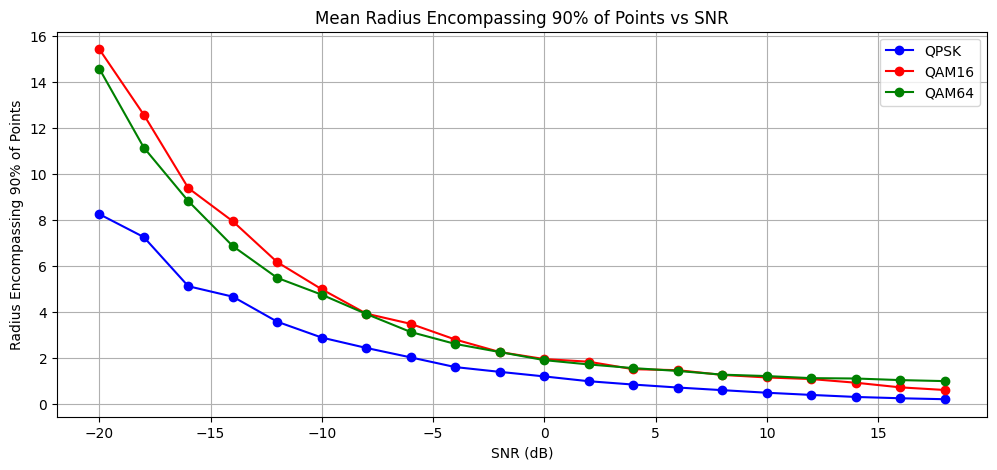

In [ ]:
# Plotting the radius against SNR values (QPSK, QAM16,QAM64)
plt.figure(figsize=(12,5))
plt.plot(snr_values, mean_ratio, marker='o', linestyle='-', color='b', label = 'QPSK')
plt.plot(snr_values2, mean_ratio2, marker='o', linestyle='-', color='r', label = 'QAM16')
plt.plot(snr_values3, mean_ratio3, marker='o', linestyle='-', color='g',label ='QAM64')
plt.title(f'Mean Radius Encompassing 90% of Points vs SNR')
plt.xlabel('SNR (dB)')
plt.ylabel(f'Radius Encompassing 90% of Points')
plt.legend()
plt.grid(True)
plt.show()